회귀
------
회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법

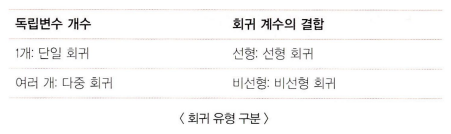

지도학습 : 분류 / 회귀
- 분류 : 예측값이 이산형 클래스 값
- 회귀 : 예측값이 연속형 숫자 값


선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식


규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것



  [회귀 모델 종류]

  - 일반 선형 회귀 : 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
  - 릿지 : 릿지 회귀는 선형회귀에 L2 규제를 추가한 회귀 모델. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
  - 라쏘 : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식. L1 규제는 예측 영향력이 작은 피처의 계수를 0으로 만들어 회귀 예측시 피처가 선택되지 않게 하는 것. L1 규제는 피처 선택 기능으로도 불림
  - 엘라스틱넷 : L2,L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정함
  - 로지스틱 회귀 : 로지스틱 회귀라는 이름이 붙어있지만, 사실은 분류에 사용되는 선형 모델임. 로지스틱 회귀는 매우 강력한 분류 알고리즘임. 일반적으로 이진 분류뿐만 아니라 최소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임

- 비선형 회귀
- 단일 회귀
- 다중 회귀

단순 선형 회귀를 통한 회귀 이해
---------------------------------
단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀

오류 합 구하는 법 : 절댓값 취해서 더하는 방식 (MSE) / 오류 값의 제곱 구해서 더하는 방식 (RSS)
- RSS : 학습 데이터의 건수로 나눠서 다음과 같이 정규화된 식으로 표현됨

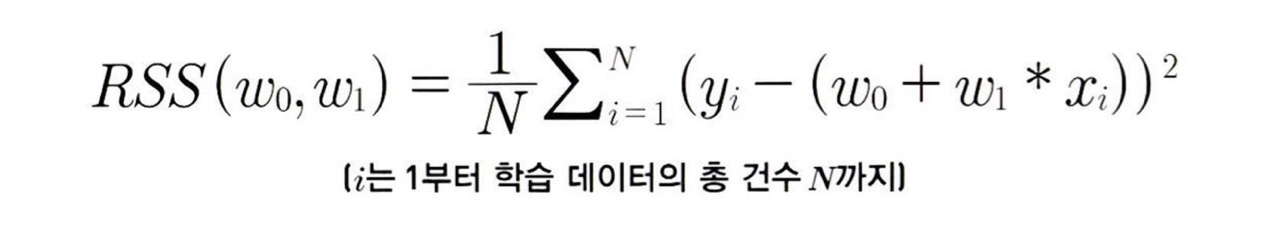



회귀에서의 RSS : 비용 / w 변수로 구성되는 RSS : 비용 함수 (=손실 함수)

머신러닝 회귀 알고리즘 : 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값 (오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것

비용 최소화하기 - 경사 하강법(Gradient Descent) 소개
---------------------------------------------------------
경사 하강법 : 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
- 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해나감
- 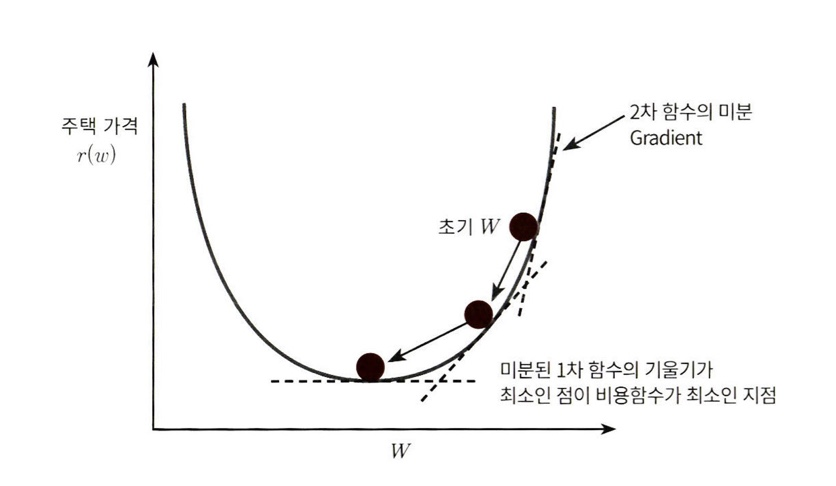

비용 함수 RSS(w0, w1)을 R(w)라 하자.

- R(w) : w 파라미터로 이뤄진 함수
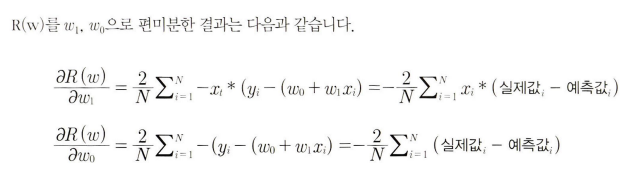

w1, w0의 편미분 결과값을 반복적으로 보정하면서 w1,w0 값을 업데이트하면 비용 함수 R(w)가 최소가 되는 w1, w0 값을 구할 수 있음

경사하강법의 프로세스

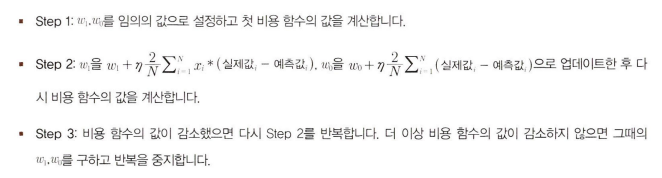

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4X+6을 근사 (w1=4, w0=6), 임의의 값은 노이즈를 위해 만듦
X=2 * np.random.rand(100,1)
y = 6+4*X+np.random.randn(100,1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

- 데이터는 y = 4X + 6 을 중심으로 무작위로 퍼져 있음

In [ ]:
# pg.298 : 비용 함수 get_cost() 정의하기

# 비용함수 get_cost()

def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N #y=실제값,y_pred=예측값
  return cost

In [ ]:
# 경사 하강법을 gradient_descent() 함수로 생성해서 구현하기

# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [ ]:
# get_weight_updates()을 경사 하강법으로 반복수행해서 w1, w0을 업데이트 하는 gradient_descent_steps() 함수 만들기

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [ ]:
# gradient_descent_steps() 호출해서 w1,w0 구하기
# 예측값과 실제값의 RSS 차이를 계산하는 get_cost() 함수 생성하기

def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

In [ ]:
# y_pred에 기반해 회귀선 그리기

plt.scatter(X, y)
plt.plot(X,y_pred)

경사 하강법의 단점
- 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 함
  - 수행 시간이 매우 오래 걸림
  - 확률적 경사 하강법 (Stochastic Gradient Descent) 이용

확률적 경사 하강법
- 일부 데이터만 이용해 w가 업데이트 되는 값을 계산함
  - 대용량의 데이터의 경우 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법으로 최적 비용함수를 도출


In [ ]:
# 확률적 경사 하강법

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 차이점: 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [ ]:
# stochastic_gradient_descent_steps() 이용해서 w1, w0, 예측 오류 비용 계산하기

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

피처가 여러 개인 경우, 회귀 계수 도출하는 법
- 피처가 M개 있다면 그에 따른 회귀계수도 M+1개로 도출됨
- 예측 행렬 Y hat으로 나타낼 수 있음

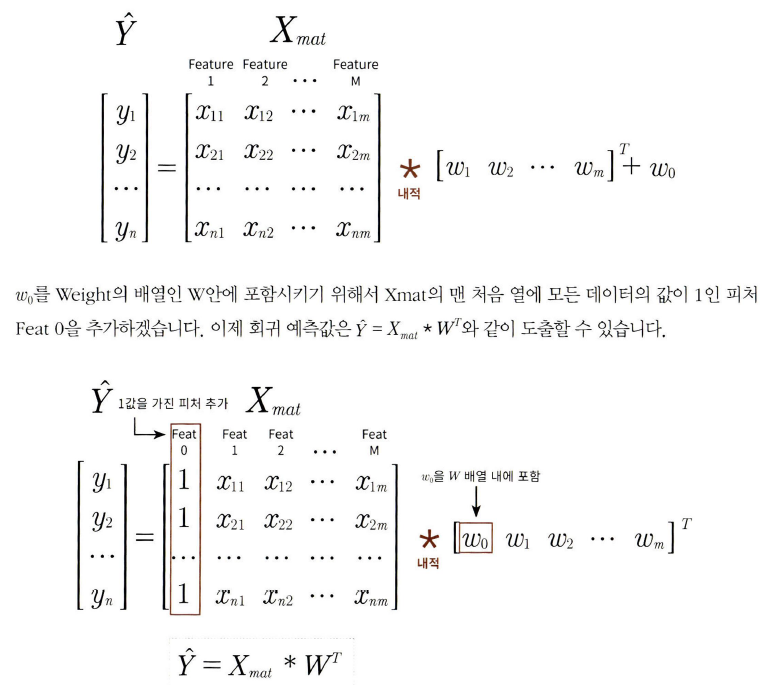

다항 회귀와 과(대)적합/과소적합 이해
========================================
다항 회귀 이해
---------------
다항 회귀 : 회귀가 독립변수의 단항식이 아닌 다항식으로 표현되는 것
- 선형 회귀임 (회귀 계수가 선형이니깐)
- 비선형 함수를 선형 모델에 적용시키는 방법을 사용해서 구현함
  - PolynomialFeatures 클래스로 단항식 피처를 다항식 피처로 변환
  - fit(), transform() 메서드로 변환 작업 수행하기...

In [ ]:
# PolynomialFeatures 이용해서 단항식 [x1,x2]를 2차 다항식으로 [1,x1,x2,x1^2,x1*x2,x2^2]로 변환하기

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

In [ ]:
# 3차 다항 회귀 함수를 임의 설정 + 회귀 계수 예측하기
# 함수의 회귀 결정 함수식을 y = 1 + 2x + 3x^2 + 4x^3 로 설정 + polynomial_func() 만들기

# polynomial_func() 함수 : 3차 다항 계수 피처 값이 입력되면 결정 값을 반환하는 함수
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

In [ ]:
# 일차 단항식 계수를 3 차 다항식 계수로 변환 + 선형 회귀에 적용하기 -> 다항 회귀로 구현됨

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

In [ ]:
# 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 더 명료한 코드 작성법

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

다항 회귀를 이용한 과소적합 및 과적합 이해
--------------------------------------------
다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐
- 차수가 높아질수록 과적합의 문제가 크게 발생

In [ ]:
# 학습 데이터 : 30개의 임의 데이터 X, X의 코사인 값에서 약간의 잡음 변동 값 더한 target y로 구성
# 그에 기반해 다항 회귀 차수를 변화시키며 회귀 예측 곡선과 예측 정확도를 비교하는 예제

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 실선 : 다항 회귀 예측 곡선
- 점선 : 실제 데이터 세트 X,Y의 코사인 곡선
- MSE 평가 : 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것


-Degree 1: 단순 선형 회귀와 같음, 과소적합 모델

-Degree 4: 실제 데이터 세트와 유사, 가장 뛰어남

-Degree 15: 오류값 이상, 과적합 심함

편향-분산 트레이드오프 (Bias-Variance Trade off)
----------------------------------------------------
- 고편향(High Bias)성 : 매우 단순화된 모델 + 지나치게 한 방향성으로 치우친 경우
- 고분산(High Variance)성 : 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 됨 + 지나치게 높은 변동성 가지는 경우

왼쪽 상단 : 뛰어난 성능
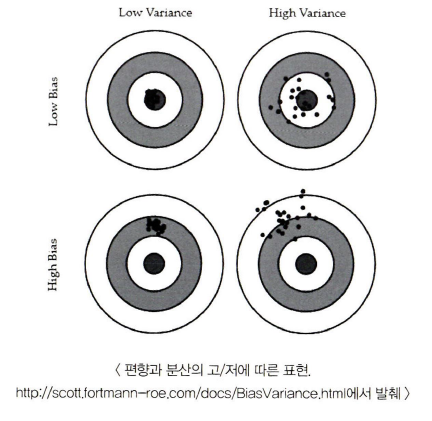

- 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향
- 편향이 높으면 분산이 낮아짐 (과소적합)
- 분산이 높으면 편향이 낮아짐 (과적합)

- 편향이 너무 높으면 전체 오류가 높음


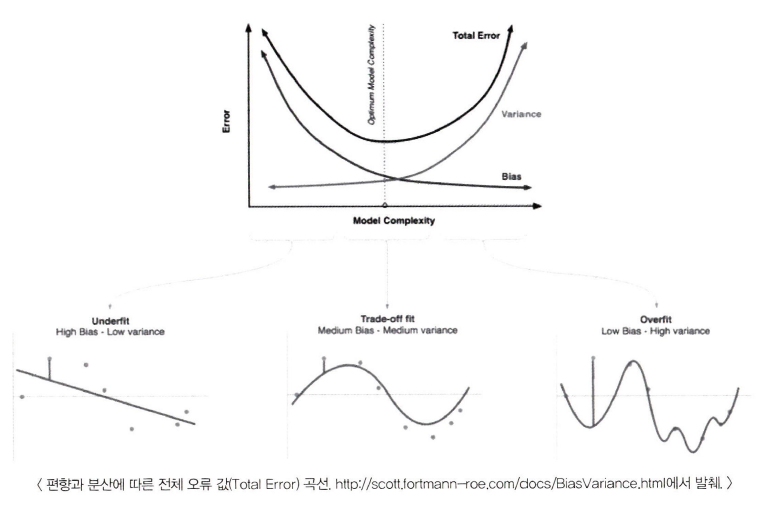